In [20]:
from gnuradio import gr,blocks
import pmt
import sys
from gnuradio.blocks import parse_file_metadata
#https://www.gnuradio.org/doc/doxygen/namespacepmt.html
#https://wiki.gnuradio.org/index.php/Polymorphic_Types_(PMTs)
dict_empty=pmt.make_dict()
dict_one_el=pmt.dict_add(pmt.make_dict(), pmt.intern('Initial'), pmt.from_long(3))
dict_two_el=pmt.dict_add(pmt.dict_add(pmt.make_dict(), pmt.intern('Initial'), pmt.from_long(3)), pmt.intern('Second'), pmt.intern('value'))


In [22]:
print(dict_one_el)
print(dict_two_el)

((Initial . 3))
((Second . value) (Initial . 3))


In [23]:
#Example for GNU Radio documentation
from gnuradio import gr,blocks
import pmt
import sys
from gnuradio.blocks import parse_file_metadata
import numpy as np

filename ='./data/data_float32_saw_tooth.bin'
max_data_segments_to_read = 3
print_output = True
fh = open(filename, "rb")
for ii in range(max_data_segments_to_read):
    header_str = fh.read(parse_file_metadata.HEADER_LENGTH)
    header = pmt.deserialize_str(header_str)
    print(f"\n===Data segment {ii} ===")
    header_info = parse_file_metadata.parse_header(header, print_output)
    if(header_info["extra_len"] > 0):
        extra_str = fh.read(header_info["extra_len"])
        if(len(extra_str) != 0):
            extra = pmt.deserialize_str(extra_str)                     
            extra_info = parse_file_metadata.parse_extra_dict(extra, header_info, print_output)  
    data=np.fromfile(file=fh, dtype=np.float32, count=int(header_info['nitems']), sep='', offset=0)
    print(f"{len(data)} data elements read")
fh.close()


===Data segment 0 ===
Version Number: 0
Sample Rate: 32000.00 sps
Seconds: 0.000000
Item size: 4
Data Type: float (5)
Complex? False
Header Length: 167 bytes
Extra Length:  18
Extra Header?  True
Size of Data: 1280 bytes
              320.0 items
Initial: 3
320 data elements read

===Data segment 1 ===
Version Number: 0
Sample Rate: 32000.00 sps
Seconds: 0.000000
Item size: 4
Data Type: float (5)
Complex? False
Header Length: 182 bytes
Extra Length:  33
Extra Header?  True
Size of Data: 1280 bytes
              320.0 items
strobe: 0
Initial: 3
320 data elements read

===Data segment 2 ===
Version Number: 0
Sample Rate: 32000.00 sps
Seconds: 0.000000
Item size: 4
Data Type: float (5)
Complex? False
Header Length: 182 bytes
Extra Length:  33
Extra Header?  True
Size of Data: 1280 bytes
              320.0 items
strobe: 0
Initial: 3
320 data elements read


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3.5))
ax=fig.add_subplot(1,1,1)
color='r'
x_r=np.real(data)
x_i=np.imag(data)
ax.plot(x_r,'b', label='real')
ax.plot(x_i,'r', label='imag')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Scatter plot and line')


In [ ]:
from gnuradio import gr,blocks
import pmt
import sys
from gnuradio.blocks import parse_file_metadata

In [3]:
#ref: https://github.com/gnuradio/gnuradio/blob/1a0be2e6b54496a8136a64d86e372ab219c6559b/gr-utils/read_file_metadata/gr_read_file_metadata
#gr_read_file_metadata only works with detached headers
filename ='./data/data_float32_saw_tooth.bin'
#filename ='./data/data_float32_saw_tooth.bin.hdr'
handle = open(filename, "rb")
nheaders = 0
nread = 0
handle.seek(0, 0) #Go to the start of the file

In [13]:
#Read metarecord

hdr_start = handle.tell()
header_str = handle.read(parse_file_metadata.HEADER_LENGTH)
try:
    header = pmt.deserialize_str(header_str)
except RuntimeError:
    sys.stderr.write("Could not deserialize header: invalid or corrupt data file.\n")

In [14]:
print(f"hdr start position: {hdr_start}, header_str: {header_str}" )
print(f"{header}")

print(f"HEADER number {nheaders}")
header_info = parse_file_metadata.parse_header(header, True)


hdr start position: 1446, header_str: b'\x07\x07\x02\x00\x04strt\x0b\x00\x00\x00\x00\x00\x00\x00\xb5\x07\x07\x02\x00\x05bytes\x0b\x00\x00\x00\x00\x00\x00\x05\x00\x07\x07\x02\x00\x04cplx\x01\x07\x07\x02\x00\x04type\x03\x00\x00\x00\x05\x07\x07\x02\x00\x04size\x03\x00\x00\x00\x04\x07\x07\x02\x00\x07rx_time\x0c\x00\x00\x00\x02\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x07\x07\x02\x00\x07rx_rate\x04@\xdf@\x00\x00\x00\x00\x00\x07\x07\x02\x00\x07version\x03\x00\x00\x00\x00\x06'
((strt . 181) (bytes . 1280) (cplx . #f) (type . 5) (size . 4) (rx_time . {0 0}) (rx_rate . 32000) (version . 0))
HEADER number 0
Version Number: 0
Sample Rate: 32000.00 sps
Seconds: 0.000000
Item size: 4
Data Type: float (5)
Complex? False
Header Length: 181 bytes
Extra Length:  32
Extra Header?  True
Size of Data: 1280 bytes
              320.0 items


In [15]:
if(header_info["extra_len"] > 0):
    extra_str = handle.read(header_info["extra_len"])
    if(len(extra_str) == 0):
        pass
    try:
        extra = pmt.deserialize_str(extra_str)
    except RuntimeError:
        sys.stderr.write("Could not deserialize extras: invalid or corrupt data file.\n")

    #print(f"\nExtra header found. Length is {header_info["extra_len"]} bytes")
                         
    extra_info = parse_file_metadata.parse_extra_dict(extra, header_info, True)
  
    print(f"Extra raw data is {extra_str}" )
    print(f"{extra_info}")

strobe: 0
Inital: 3
Extra raw data is b'\x07\x07\x02\x00\x06strobe\x02\x00\x010\x07\x07\x02\x00\x06Inital\x03\x00\x00\x00\x03\x06'
{'rx_rate': 32000.0, 'rx_time': 0.0, 'size': 4, 'type': 'float', 'cplx': False, 'hdr_len': 181, 'extra_len': 32, 'has_extra': True, 'nitems': 320.0, 'nbytes': 1280, 'strobe': 0, 'Inital': 3}


In [8]:
print(f'The current position is {handle.tell()}')

The current position is 166


In [9]:
header_info['nbytes']

1280

In [10]:
#Plot data
import numpy as np
data=np.fromfile(file=handle, dtype=np.float32, count=int(header_info['nitems']), sep='', offset=0)

Text(0.5, 1.0, 'Scatter plot and line')

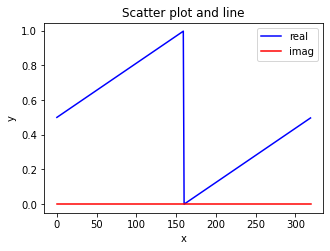

In [5]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3.5))
ax=fig.add_subplot(1,1,1)
color='r'
x_r=np.real(data)
x_i=np.imag(data)
ax.plot(x_r,'b', label='real')
ax.plot(x_i,'r', label='imag')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Scatter plot and line')


In [16]:
handle.close()